In [66]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [6]:
dataframe = pd.read_csv("/home/aditya/Downloads/films.csv")

In [7]:
dataframe

,gender,is_28+,employment_status,watching
0,M,0,student,yes
1,M,1,working,yes
2,F,0,working,yes
3,F,0,student,no
4,M,1,working,yes
5,M,1,working,yes
6,F,0,working,yes
7,M,0,student,no
8,F,1,working,no
9,M,0,working,no


In [8]:
dataframe.describe()

,is_28+
count,50.000000
mean,0.440000
std,0.501427
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [9]:
dataframe["watching"].value_counts()

yes    26
no     24
Name: watching, dtype: int64

In [10]:
dataframe["gender"].value_counts()

M    28
F    22
Name: gender, dtype: int64

# Gini Index

In [11]:
pd.crosstab(index=dataframe["gender"], columns=dataframe["watching"])

watching,no,yes
gender,,
F,8,14
M,16,12


In [12]:
P_M_w = 12/(12+16)     # Pobability that a male watched the movie
print(P_M_w)

0.42857142857142855


In [13]:
P_F_w = 14/(14+8)      # Pobability that a female watched the movie
print(P_F_w)

0.6363636363636364


In [14]:
gini_M = 2*(P_M_w)*(1-P_M_w)    #Gini index of males
gini_F = 2*(P_F_w)*(1-P_F_w)
print(gini_M)
print(gini_F)

0.48979591836734687
0.4628099173553719


In [15]:
Weighted_gini_gender = ( (28/50) * (gini_M) ) + ( (22/50) * (gini_F))
print(Weighted_gini_gender)

0.47792207792207797


In [16]:
pd.crosstab(index=dataframe["employment_status"], columns=dataframe["watching"])

watching,no,yes
employment_status,,
student,5,4
working,19,22


In [17]:
P_S_w = 5/(5+4)
P_W_w = 22/(22+19)
gini_S = 2 * (P_S_w) * (1-P_S_w)
gini_W = 2 * (P_W_w) * (1-P_W_w)
Weighted_gini_status = ( (9/50) * (gini_S) + (41/50) * (gini_W))
print(Weighted_gini_status)

0.4966937669376693


In [18]:
pd.crosstab(index=dataframe["is_28+"], columns=dataframe["watching"])

watching,no,yes
is_28+,,
0,11,17
1,13,9


In [19]:
P_below28_w = 17/(17+11)
P_above28_w = 9/(9+13)
gini_below28 = 2 * (P_below28_w) * (1-P_below28_w)
gini_above28 = 2 * (P_above28_w) * (1-P_above28_w)
Weighted_gini_age = ( (28/50) * gini_below28 + (22/50) * (gini_above28))
print(Weighted_gini_age)

0.4798701298701299


In [20]:
# Root node selected as gender (closest to 0)

# Entropy

In [21]:
Entropy_M = - P_M_w * (np.log2(P_M_w)) - (1-P_M_w) * (np.log2(1-P_M_w))
print(Entropy_M)

0.9852281360342515


In [22]:
Entropy_F = - P_F_w * (np.log2(P_F_w)) - (1-P_F_w) * (np.log2(1-P_F_w))
print(Entropy_F)

0.9456603046006401


In [23]:
# Entropy for gender column
Entropy_gender = ( (28/50) * (Entropy_M) + (22/50) * (Entropy_F))
print(Entropy_gender)

0.9678182902034626


In [24]:
# Entropy of watching column 
Entropy_watching = -(26/50) * (np.log2(26/50)) - (24/50) * (np.log2(24/50)) 
print(Entropy_watching)

0.9988455359952018


In [25]:
Entropy_watching - Entropy_gender

0.03102724579173921

# Decision Tree

In [26]:
DecisionTree = DecisionTreeClassifier()

In [27]:
x = dataframe.iloc[:, 0:3]
y = dataframe.iloc[:, -1]
XTrain, XTest, YTrain, YTest = train_test_split(x, y, test_size=0.3, random_state=10)  # Can't fit this as columns contain string values, we need to convert it into numeric values

In [28]:
le_g = LabelEncoder()  # Label Encoder is used to label strings to unique numbers
dataframe["gender"] = le_g.fit_transform(dataframe["gender"])

In [29]:
le_employment = LabelEncoder()
dataframe["employment_status"] = le_employment.fit_transform(dataframe["employment_status"])

In [30]:
le_watch = LabelEncoder()
dataframe["watching"] = le_watch.fit_transform(dataframe["watching"])

In [31]:
x = dataframe.iloc[:, 0:3]
y = dataframe.iloc[:, -1]
XTrain, XTest, YTrain, YTest = train_test_split(x, y, test_size=0.3, random_state=1)
print(x)
print(y)

    gender  is_28+  employment_status
0        1       0                  0
1        1       1                  1
2        0       0                  1
3        0       0                  0
4        1       1                  1
5        1       1                  1
6        0       0                  1
7        1       0                  0
8        0       1                  1
9        1       0                  1
10       1       1                  1
11       1       1                  1
12       1       1                  1
13       0       1                  1
14       0       0                  0
15       1       1                  1
16       0       0                  1
17       1       0                  1
18       0       1                  1
19       1       0                  1
20       1       1                  1
21       0       0                  1
22       1       1                  1
23       0       0                  1
24       0       1                  1
25       0  

In [32]:
DecisionTree.fit(XTrain, YTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
DecisionTree.predict(XTest)

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1])

In [34]:
YTest

27    1
35    1
40    0
38    1
2     1
3     0
48    1
29    0
46    0
31    0
32    1
39    0
21    1
36    1
19    1
Name: watching, dtype: int64

In [35]:
accuracy_score(DecisionTree.predict(XTest), YTest)

0.7333333333333333

In [36]:
accuracy_score(DecisionTree.predict(XTrain), YTrain)

0.6

# Decision Tree Representaion

In [38]:
import graphviz
import pydotplus
from sklearn import tree
from IPython.display import Image

In [39]:
X = ["gender", "is_28+", "employment_status"]
Y = ["watching_yes", "watching_no"]

In [40]:
tree.export_graphviz(DecisionTree, out_file="tree.dot", filled=True, rounded=True, special_characters=True, feature_names=X, class_names=Y)

In [41]:
graph = pydotplus.graph_from_dot_file("tree.dot")

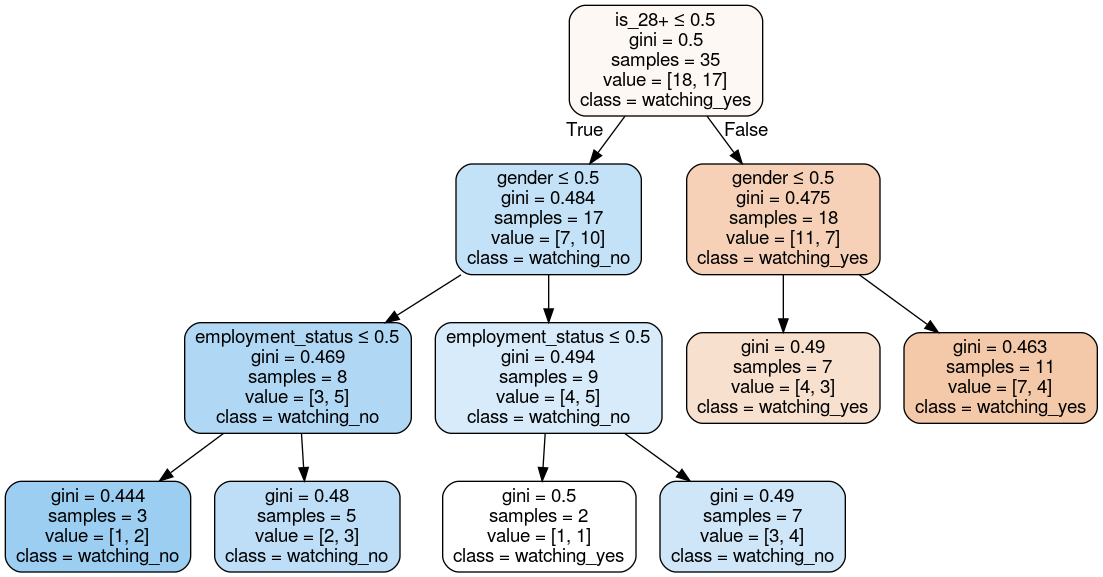

In [42]:
Image(graph.create_png())

In [43]:
DT = DecisionTreeClassifier()

In [44]:
dataframe

,gender,is_28+,employment_status,watching
0,1,0,0,1
1,1,1,1,1
2,0,0,1,1
3,0,0,0,0
4,1,1,1,1
5,1,1,1,1
6,0,0,1,1
7,1,0,0,0
8,0,1,1,0
9,1,0,1,0


In [45]:
x = dataframe.iloc[:, 0:3]
y = dataframe.iloc[:, -1]
print(x)
print(y)

    gender  is_28+  employment_status
0        1       0                  0
1        1       1                  1
2        0       0                  1
3        0       0                  0
4        1       1                  1
5        1       1                  1
6        0       0                  1
7        1       0                  0
8        0       1                  1
9        1       0                  1
10       1       1                  1
11       1       1                  1
12       1       1                  1
13       0       1                  1
14       0       0                  0
15       1       1                  1
16       0       0                  1
17       1       0                  1
18       0       1                  1
19       1       0                  1
20       1       1                  1
21       0       0                  1
22       1       1                  1
23       0       0                  1
24       0       1                  1
25       0  

In [46]:
XTrain, XTest, YTrain, YTest = train_test_split(x, y, test_size=0.3, random_state=5)

In [47]:
DT.fit(XTrain, YTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [48]:
DT.predict(XTest)

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1])

In [49]:
YTest

42    0
29    0
6     1
19    1
28    1
17    1
2     1
43    1
3     0
21    1
31    0
4     1
32    1
0     1
23    0
Name: watching, dtype: int64

In [50]:
accuracy_score(DT.predict(XTest), YTest)

0.4666666666666667

In [51]:
accuracy_score(DT.predict(XTrain), YTrain)

0.6571428571428571

In [52]:
tree.export_graphviz(DT, out_file="tree1.dot", filled=True, rounded=True, special_characters=True, feature_names=X, class_names=Y)

In [53]:
graph = pydotplus.graph_from_dot_file("tree1.dot")

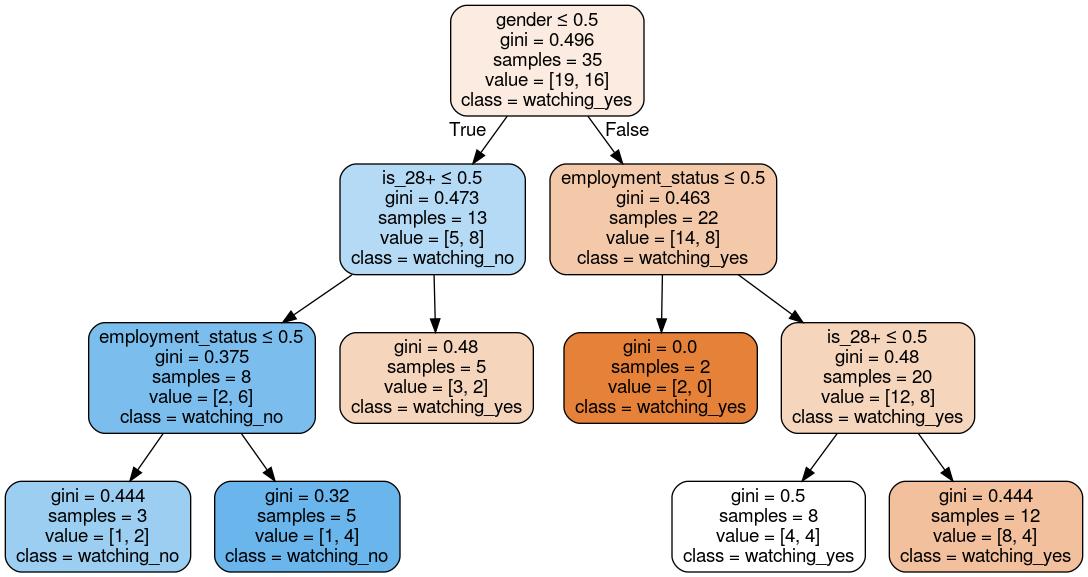

In [54]:
Image(graph.create_png())

# Evaluation (Confusion Matrix)

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [56]:
confusion_matrix(YTest, DT.predict(XTest))

array([[3, 2],
       [6, 4]])

In [57]:
confusion_matrix = pd.DataFrame(confusion_matrix(YTest, DT.predict(XTest)))

In [58]:
confusion_matrix

,0,1
0,3,2
1,6,4


In [61]:
print(classification_report(YTest, DT.predict(XTest)))

              precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       0.67      0.40      0.50        10

    accuracy                           0.47        15
   macro avg       0.50      0.50      0.46        15
weighted avg       0.56      0.47      0.48        15



In [63]:
3/9  # Precision of 0

0.3333333333333333

In [65]:
4/6   # Precision of 1

0.6666666666666666